<a href="https://colab.research.google.com/github/vinginfinic/Face_recognition_keras_tensorflow/blob/master/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pip install -q keras

In [ ]:
import keras

['16CL021537', '16CL021535', '16CL021534', '16CL021532', '15CL03796', '16CL021533', '15CL03821', '15CL03810', '16CL021539', '16CL021538', '16CL021544', '16CL021547', '16CL021542', '16CL021545', '16CL021546', '16CL021540']
Found 16 images belonging to 16 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


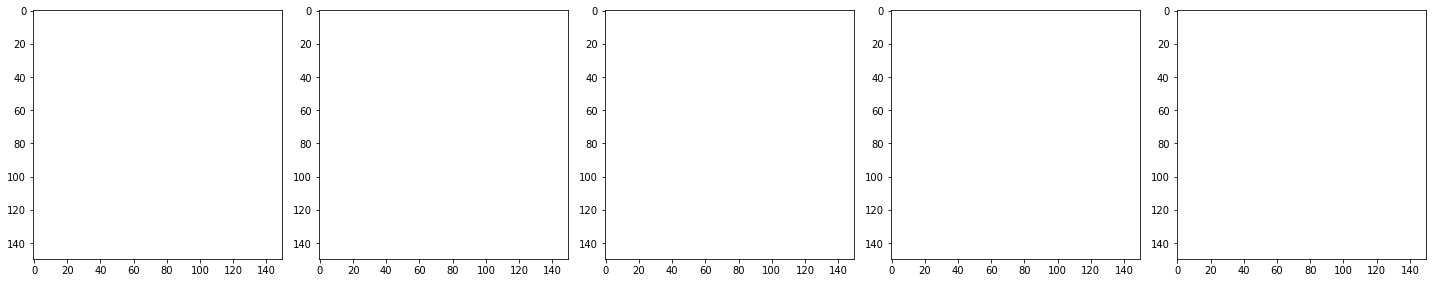

In [ ]:
#Import Packages
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Show the classes in the dataset
base_dir = '/content/drive/My Drive/Colab Notebooks/Hachthon_Python/students'
strClasses = os.listdir(base_dir)
print(strClasses)

#Load Datset, Show the path and number of images in each class
for j in strClasses:
    img_path = os.path.join(base_dir,j)   
    imgDataset = glob.glob(img_path + '/*.jpg')
    #print (j)
    #print (imgDataset)
    #print (len(imgDataset))
    #plt.show(imgDataset)
    #print ('(): () Images'.format(j,len(imgDataset)))
    #Partition the dataset
    numTrain = int(round(len(imgDataset)*0.8))
    train = imgDataset[:numTrain]      
    val = imgDataset[numTrain:]

#Batch Size and Image Shape
batchSize = 100
imgShape = 150

def plotImages(imgArray):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(imgArray, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show       

imgGenTrain = ImageDataGenerator(
                rotation_range=45,
                width_shift_range=.15,
                height_shift_range=.15,
                horizontal_flip=True,
                zoom_range = 0.5)
    
trainDataGen = imgGenTrain.flow_from_directory(
                    '/content/drive/My Drive/Colab Notebooks/Hachthon_Python/students/',
                    batch_size=batchSize,
                    shuffle=True,
                    target_size=(imgShape,imgShape),
                    class_mode='categorical',
                    save_to_dir='/content/drive/My Drive/Colab Notebooks/Hachthon_Python/Augmented_Images/')
    
augmentedImages = [trainDataGen[0][0][0] for i in range(5)]
    
plotImages(augmentedImages)